<strong>Constants, Tools, and Files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import scipy.stats as st
from scipy.optimize import curve_fit

# Z boson
mZ0 = 91.1880 #GeV/c^2
sig_mZ0 = 0.0020 #GeV/c^2

Gamma_0_Z = 2.495  #GeV
sig_Gamma_0_Z = 0.002 #GeV

# W boson
mW = 80.3692 #GeV/c^2
sig_mW = 0.0133 #GeV/c^2

# Higgs boson
mH = 125.20 #GeV/c^2
sig_mH = 0.11 #GeV/c^2

# Electron
mE = 0.51099895000 #MeV/c^2
sig_mE = 0.00000000015 #MeV/c^2

# Muon
mM = 105.6583755 #MeV/c^2
sig_mM = 0.0000023 #MeV/c^2

# Tau
mT = 1776.93 #MeV/c^2
sig_mT = 0.09 #MeV/c^2

In [2]:
atlas_data = np.loadtxt("atlas_z_to_ll.csv", delimiter=",", skiprows=1, max_rows=5000, dtype=float)
p1 = atlas_data[:,0]
p2 = atlas_data[:,1]
eta1 = atlas_data[:,2]
eta2 = atlas_data[:,3]
phi1 = atlas_data[:,4]
phi2 = atlas_data[:,5]
E1 = atlas_data[:,6]
E2 = atlas_data[:,7]

<strong>Part I: Invariant Mass Distribution

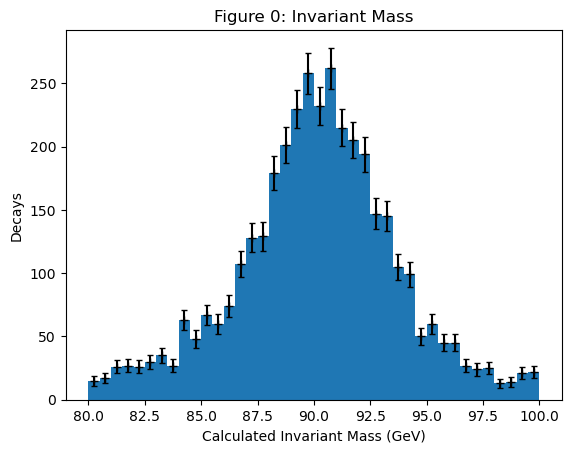

In [3]:
E = E1 + E2
px = p1*np.cos(phi1) + p2*np.cos(phi2)
py = p1*np.sin(phi1) + p2*np.sin(phi2)
pz = p1*np.sinh(eta1) + p2*np.sinh(eta2)
p_tot = px**2 + py**2 + pz**2

Mass = np.sqrt(E**2 - (p_tot))

bins = np.linspace(80, 100, 41)

fig, ax=plt.subplots(1,1)
ax.set_title("Figure 0: Invariant Mass")
ax.set_ylabel("Decays")
ax.set_xlabel("Calculated Invariant Mass (GeV)")
ax.hist(Mass, bins=bins)

counts, edges = np.histogram(Mass, bins=bins)
centers = 0.5* (edges[:-1] + edges[1:])
fish_err = np.sqrt(counts)
ax.errorbar(centers, counts, yerr=fish_err, fmt='+', color='k', capsize=2);

<strong>Part II: Breit-Wigner Fit

Best fit m = 90.341 ± 0.094 GeV
Best fit Γ  = 6.391 ± 0.181 GeV
Breit-Wigner Model Χ² = 9.985097164263717
NDOF = 0.9985097164263717
P-value = 0.44180173856272786


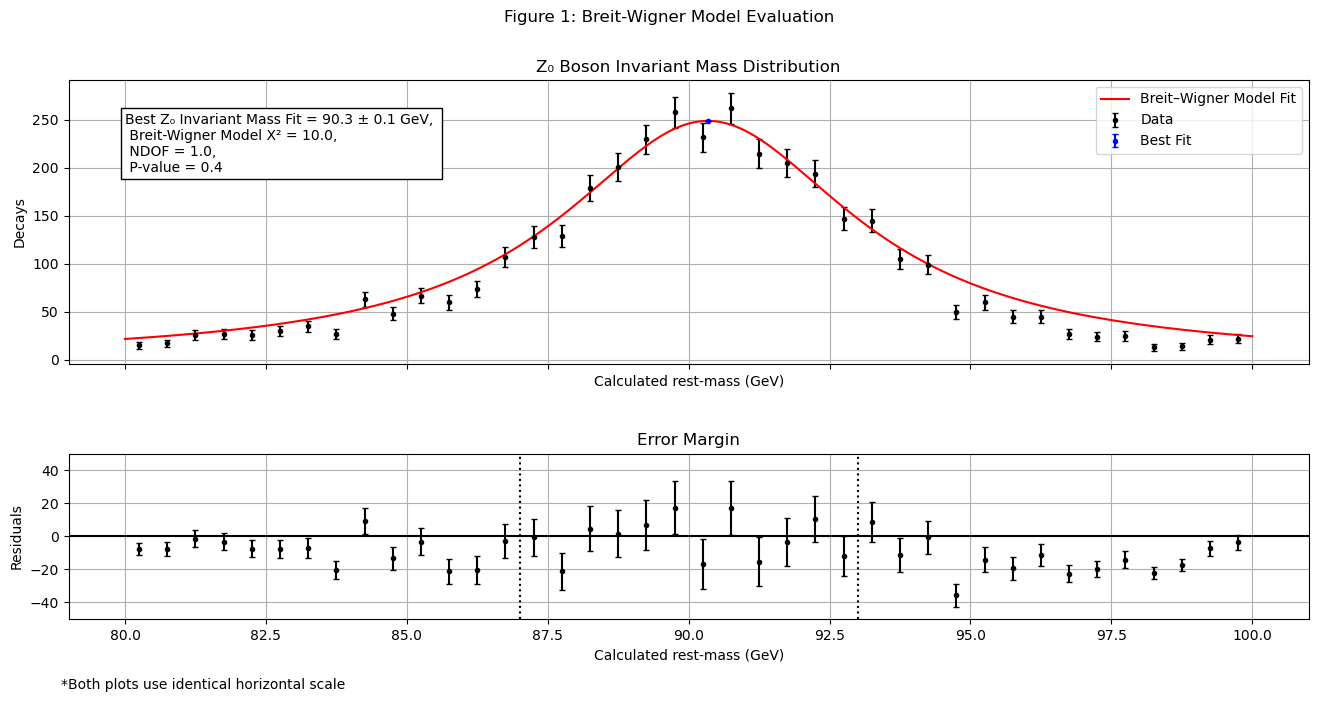

In [4]:
mask = (centers > 87) & (centers < 93)
fit_x = centers[mask]
fit_y = counts[mask]
fit_err = fish_err[mask]

def D(m, mZ0, Gamma):
    A = 5000/2
    return (A/np.pi)*((0.5*Gamma)/((m - mZ0)**2 + (0.5 * Gamma)**2))

params, pcov = curve_fit(D, fit_x, fit_y, sigma=fit_err, absolute_sigma=True)
m_fit, Gamma_fit = params
m_err, Gamma_err = np.sqrt(np.diag(pcov))
m = np.linspace(80, 100, 500)

print(f"Best fit m = {m_fit:.3f} \u00b1 {m_err:.3f} GeV")
print(f"Best fit \u0393  = {Gamma_fit:.3f} \u00b1 {Gamma_err:.3f} GeV")

fig, (ax_top, ax_bot) = plt.subplots(2, 1, sharex=True, figsize=(16,7), gridspec_kw={'height_ratios':[3,1.75], 'hspace' : 0.4})
fig, plt.figtext(0.12, 0.01, "*Both plots use identical horizontal scale", ha="left", fontsize=10)
fig.suptitle("Figure 1: Breit-Wigner Model Evaluation")
ax_top.set_title('Z\u2080 Boson Invariant Mass Distribution')
ax_top.set_xlabel('Calculated rest-mass (GeV)')
ax_top.set_ylabel('Decays')
ax_top.errorbar(centers, counts, yerr=fish_err, fmt='.', capsize=2, label="Data", color="black") #data plot

ax_top.plot(m, D(m, *params), label="Breit–Wigner Model Fit", color='red') #model plot

ax_top.grid(True)
ax_top.errorbar(m_fit, 249, yerr=m_err, fmt='b.', capsize=2, label='Best Fit') #best fit point
ax_top, plt.text(80,220,'Best Z\u2080 Invariant Mass Fit = 90.3 \u00b1 0.1 GeV, \n Breit-Wigner Model \u03a7\u00B2 = 10.0, \n NDOF = 1.0, \n P-value = 0.4', bbox=dict(boxstyle='square', facecolor='white', alpha = 1))

residuals_m = (fit_y-D(fit_x, *params)) #X2 residuals
residuals_m_full = (counts-D(centers, *params)) #Visualization only, not for X2

ax_bot.errorbar(centers, residuals_m_full, yerr=fish_err, fmt='k.', capsize=2) #residual plot
ax_bot.grid(True)
ax_bot.set_ylim(-50,50)
ax_bot.axhline(0, color='k')#, linestyle='_')
ax_bot.axvline(87, color='k', linestyle=':')
ax_bot.axvline(93, color='k', linestyle=':')
ax_bot.set_xlabel('Calculated rest-mass (GeV)')
ax_bot.set_ylabel('Residuals')
ax_bot.set_title('Error Margin')
ax_top.legend(loc='upper right');

chi2_m = np.sum((residuals_m / fit_err)**2) #use masked residual
v = len(fit_x)-2
red_chi2_m = chi2_m/v
pval_m = st.chi2.sf(chi2_m, v)

print('Breit-Wigner Model \u03a7\u00B2 =', chi2_m)
print('NDOF =', red_chi2_m)
print('P-value =', pval_m)
# plt.savefig("Lab3_pt2_BWmodel.png")

<strong>Part III: 2D Parameter Scan

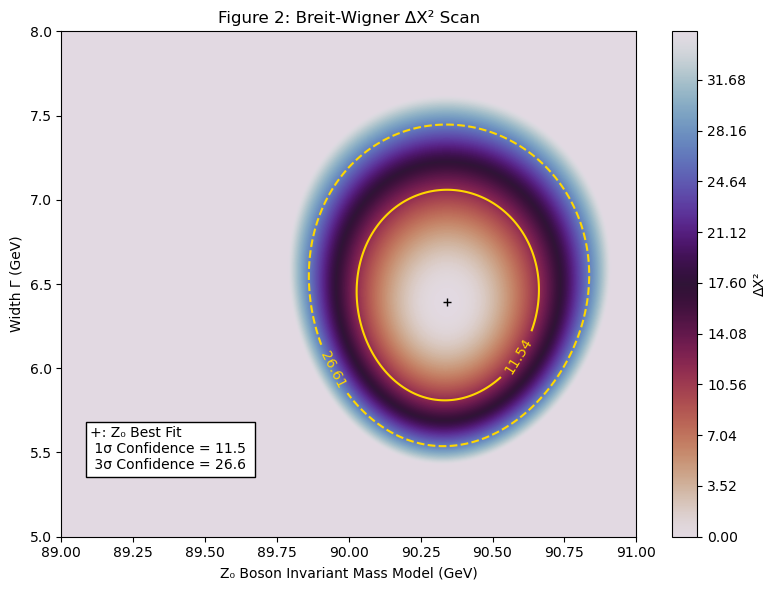

In [8]:
# mask = (centers > 87) & (centers < 93)
# fit_x = centers[mask]
# fit_y = counts[mask]
# fit_err = fish_err[mask]

n_bins = 300
M = np.linspace(89, 91, n_bins)
G = np.linspace(5, 8, n_bins)
chi_map = np.zeros((n_bins, n_bins))

for i in range (n_bins):
    for j in range (n_bins):
        theory = D(fit_x, M[i], G[j]) #model in 2D
        chi2 = np.sum(((fit_y-theory) / fit_err)**2) #masked chi analysis
        chi_map[j,i] = chi2

chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35) #clip to 35
delta_chi_map = chi_map - chi_min

X, Y = np.meshgrid(M,G)

chi2_1sig = st.chi2.ppf(0.683, v) #sig1
chi2_3sig = st.chi2.ppf(0.997, v) #sig2
# print(chi2_1sig, chi2_3sig)

fig2, ax2 = plt.subplots(1,1, figsize=(8,6))
ax2.set_title('Figure 2: Breit-Wigner \u0394\u03a7\u00B2 Scan')
ax2.set_ylabel('Width \u0393 (GeV)')
ax2.set_xlabel('Z\u2080 Boson Invariant Mass Model (GeV)')
cs = ax2.contourf(X, Y, delta_chi_map, 500, cmap=cm.twilight_r)
cbar = fig2.colorbar(cs, ax=ax2)
cbar.set_label("\u0394\u03a7\u00B2")

levels = [chi2_1sig, chi2_3sig]
CS = ax2.contour(X, Y, delta_chi_map, levels=levels, colors = ["gold", "gold"], linestyles=["solid", "dashed"])
ax2.clabel(CS, CS.levels, fontsize=10)
ax2.plot(m_fit, Gamma_fit, 'k+')
ax2, plt.text(89.1,5.4,'+: Z\u2080 Best Fit \n 1\u03c3 Confidence = 11.5 \n 3\u03c3 Confidence = 26.6', bbox=dict(boxstyle='square', facecolor='white', alpha = 1))

fig, plt.tight_layout();
# plt.savefig("Lab3_pt3_2d_BWmodel_Revised.png")